In [675]:
import urllib2
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
raw_csv = urllib2.urlopen(path)
feature_names = ('buying', 'maint', 'doors', 'persons', "log_boot", "safety")
target_name = 'eval'
all_names = feature_names + (target_name,)
df = pd.read_csv(raw_csv, names=all_names)

In [676]:
df

,buying,maint,doors,persons,log_boot,safety,eval
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [677]:
df.describe()

,buying,maint,doors,persons,log_boot,safety,eval
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,3,more,med,med,unacc
freq,432,432,432,576,576,576,1210


In [678]:
print df.shape[0], df.shape[1]

1728 7


In [679]:
num_columns = df.shape[1]-1
map_dic = {}
for i in range(num_columns):
    if i==0 :
        unique_array = df['buying'].unique()
    elif i==1 :
        unique_array = df['maint'].unique()
    elif i==2 :
        unique_array = df['doors'].unique()
    elif i==3 :
        unique_array = df['persons'].unique()
    elif i==4 :
        unique_array = df['log_boot'].unique()
    elif i==5 :
        unique_array = df['safety'].unique()
#    else :
#        unique_array = df['eval'].unique()
    N = len(unique_array)
    map_dic[i] = {}
    for j in range(N):
        map_dic[i][unique_array[j]]=j
       
    if i==0 :
        df['buying'] = df['buying'].map(map_dic[i])
    elif i==1 :
        df['maint'] = df['maint'].map(map_dic[i])
    elif i==2 :
        df['doors'] = df['doors'].map(map_dic[i])
    elif i==3 :
        df['persons'] = df['persons'].map(map_dic[i])
    elif i==4 :
        df['log_boot'] = df['log_boot'].map(map_dic[i])
    elif i==5 :
        df['safety'] = df['safety'].map(map_dic[i])
#    else :
#        df['eval'] = df['eval'].map(map_dic[i])

In [680]:
map_dic

{0: {'high': 1, 'low': 3, 'med': 2, 'vhigh': 0},
 1: {'high': 1, 'low': 3, 'med': 2, 'vhigh': 0},
 2: {'2': 0, '3': 1, '4': 2, '5more': 3},
 3: {'2': 0, '4': 1, 'more': 2},
 4: {'big': 2, 'med': 1, 'small': 0},
 5: {'high': 2, 'low': 0, 'med': 1}}

In [681]:
df.describe()

,buying,maint,doors,persons,log_boot,safety
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000


In [682]:
for i in range(num_columns):
    if i==0 :
        unique_array = df['buying'].unique()
    elif i==1 :
        unique_array = df['maint'].unique()
    elif i==2 :
        unique_array = df['doors'].unique()
    elif i==3 :
        unique_array = df['persons'].unique()
    elif i==4 :
        unique_array = df['log_boot'].unique()
    elif i==5 :
        unique_array = df['safety'].unique()
#    else :
#        unique_array = df['eval'].unique()
    N = len(unique_array)
    map_dic_sub = {}
    for j in range(N):
        if j == 0:
            map_dic_sub[j]=0
        else:
            map_dic_sub[j]=j/float(N-1)
       
    if i==0 :
        df['buying'] = df['buying'].map(map_dic_sub)
    elif i==1 :
        df['maint'] = df['maint'].map(map_dic_sub)
    elif i==2 :
        df['doors'] = df['doors'].map(map_dic_sub)
    elif i==3 :
        df['persons'] = df['persons'].map(map_dic_sub)
    elif i==4 :
        df['log_boot'] = df['log_boot'].map(map_dic_sub)
    elif i==5 :
        df['safety'] = df['safety'].map(map_dic_sub)
#   else :
#        df['eval'] = df['eval'].map(map_dic_sub)

In [683]:
df

,buying,maint,doors,persons,log_boot,safety,eval
0,0,0,0.000000,0.0,0.0,0.0,unacc
1,0,0,0.000000,0.0,0.0,0.5,unacc
2,0,0,0.000000,0.0,0.0,1.0,unacc
3,0,0,0.000000,0.0,0.5,0.0,unacc
4,0,0,0.000000,0.0,0.5,0.5,unacc
5,0,0,0.000000,0.0,0.5,1.0,unacc
6,0,0,0.000000,0.0,1.0,0.0,unacc
7,0,0,0.000000,0.0,1.0,0.5,unacc
8,0,0,0.000000,0.0,1.0,1.0,unacc
9,0,0,0.000000,0.5,0.0,0.0,unacc


In [684]:
df.describe()

,buying,maint,doors,persons,log_boot,safety
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
std,0.372786,0.372786,0.372786,0.408366,0.408366,0.408366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.250000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,0.750000,0.750000,0.750000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [685]:
groupby_eval = df.groupby('eval')

In [686]:
groupby_eval.groups

{'acc': [227L,
  230L,
  232L,
  233L,
  239L,
  241L,
  242L,
  254L,
  257L,
  259L,
  260L,
  263L,
  265L,
  266L,
  268L,
  269L,
  281L,
  283L,
  284L,
  286L,
  287L,
  290L,
  292L,
  293L,
  295L,
  296L,
  308L,
  310L,
  311L,
  313L,
  314L,
  317L,
  319L,
  320L,
  322L,
  323L,
  335L,
  338L,
  340L,
  341L,
  347L,
  349L,
  350L,
  362L,
  365L,
  367L,
  368L,
  371L,
  373L,
  374L,
  376L,
  377L,
  389L,
  391L,
  392L,
  394L,
  395L,
  398L,
  400L,
  401L,
  403L,
  404L,
  416L,
  418L,
  419L,
  421L,
  422L,
  425L,
  427L,
  428L,
  430L,
  431L,
  551L,
  554L,
  556L,
  557L,
  563L,
  565L,
  566L,
  578L,
  581L,
  583L,
  584L,
  587L,
  589L,
  590L,
  592L,
  593L,
  605L,
  607L,
  608L,
  610L,
  611L,
  614L,
  616L,
  617L,
  619L,
  620L,
  632L,
  634L,
  635L,
  637L,
  638L,
  641L,
  643L,
  644L,
  646L,
  647L,
  659L,
  662L,
  664L,
  665L,
  671L,
  673L,
  674L,
  686L,
  689L,
  691L,
  692L,
  695L,
  697L,
  698L,
  700L,
  701L,
 

In [687]:
a = groupby_eval.get_group('unacc')

In [688]:
b = groupby_eval.get_group('acc')

In [689]:
c = groupby_eval.get_group('good')

In [690]:
d = groupby_eval.get_group('vgood')

In [691]:
a.describe()

,buying,maint,doors,persons,log_boot,safety
count,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000
mean,0.450138,0.455647,0.484848,0.395041,0.466116,0.376446
std,0.372700,0.375849,0.375717,0.417930,0.409877,0.401382
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.333333,0.333333,0.333333,0.500000,0.500000,0.500000
75%,0.666667,0.666667,0.666667,1.000000,1.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [692]:
df_edible = a[a['buying'] == 0]    # 0: edible
df_poisonous = a[a['buying'] == 1] # 1: poisonous

In [693]:
df_edible.describe()

,buying,maint,doors,persons,log_boot,safety
count,360,360.000000,360.000000,360.000000,360.000000,360.000000
mean,0,0.433333,0.490741,0.450000,0.475000,0.436111
std,0,0.367177,0.374737,0.415909,0.409752,0.405500
min,0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0,0.333333,0.333333,0.500000,0.500000,0.500000
75%,0,0.666667,0.666667,1.000000,1.000000,1.000000
max,0,1.000000,1.000000,1.000000,1.000000,1.000000


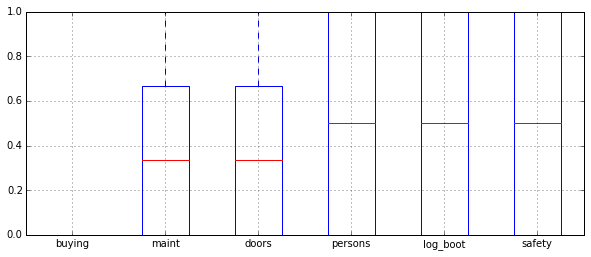

In [694]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
df_edible.boxplot(ax=ax)
plt.show()

In [695]:
df_poisonous.describe()

,buying,maint,doors,persons,log_boot,safety
count,258,258.000000,258.000000,258.000000,258.000000,258.000000
mean,1,0.480620,0.481912,0.337209,0.470930,0.321705
std,0,0.378650,0.377571,0.414535,0.411564,0.398433
min,1,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1,0.333333,0.333333,0.000000,0.500000,0.000000
75%,1,0.666667,0.666667,0.500000,1.000000,0.500000
max,1,1.000000,1.000000,1.000000,1.000000,1.000000


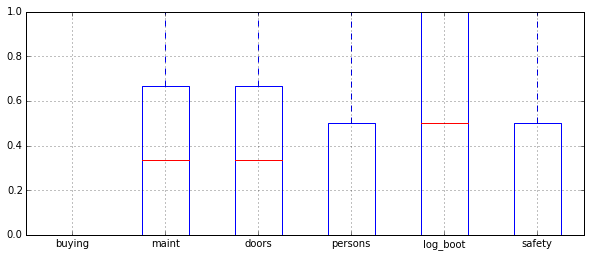

In [696]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
df_poisonous.boxplot(ax=ax)
plt.show()

In [697]:
b.describe()

,buying,maint,doors,persons,log_boot,safety
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,0.525174,0.530382,0.528646,0.742188,0.550781,0.765625
std,0.347318,0.349400,0.364975,0.250204,0.399934,0.249837
min,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000
25%,0.333333,0.333333,0.333333,0.500000,0.000000,0.500000
50%,0.666667,0.666667,0.666667,0.500000,0.500000,1.000000
75%,0.666667,0.666667,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [698]:
df_edible = b[b['buying'] == 0]    # 0: edible
df_poisonous = b[b['buying'] == 1] # 1: poisonous

In [699]:
df_edible.describe()

,buying,maint,doors,persons,log_boot,safety
count,72,72.000000,72.000000,72.000000,72.000000,72.000000
mean,0,0.833333,0.546296,0.750000,0.625000,0.819444
std,0,0.167836,0.363884,0.251754,0.382265,0.241847
min,0,0.666667,0.000000,0.500000,0.000000,0.500000
25%,0,0.666667,0.333333,0.500000,0.500000,0.500000
50%,0,0.833333,0.666667,0.750000,0.500000,1.000000
75%,0,1.000000,1.000000,1.000000,1.000000,1.000000
max,0,1.000000,1.000000,1.000000,1.000000,1.000000


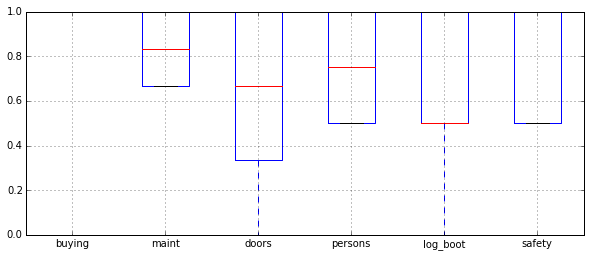

In [700]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
df_edible.boxplot(ax=ax)
plt.show()

In [701]:
df_poisonous.describe()

,buying,maint,doors,persons,log_boot,safety
count,89,89.000000,89.000000,89.000000,89.000000,89.000000
mean,1,0.310861,0.501873,0.730337,0.438202,0.685393
std,0,0.328748,0.369697,0.250638,0.404662,0.242876
min,1,0.000000,0.000000,0.500000,0.000000,0.500000
25%,1,0.000000,0.333333,0.500000,0.000000,0.500000
50%,1,0.333333,0.333333,0.500000,0.500000,0.500000
75%,1,0.333333,0.666667,1.000000,1.000000,1.000000
max,1,1.000000,1.000000,1.000000,1.000000,1.000000


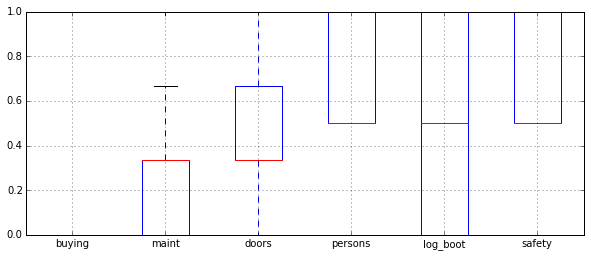

In [702]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
df_poisonous.boxplot(ax=ax)
plt.show()

In [703]:
c.describe()

,buying,maint,doors,persons,log_boot,safety
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,0.888889,0.888889,0.521739,0.739130,0.521739,0.717391
std,0.158286,0.158286,0.368171,0.251593,0.406155,0.249680
min,0.666667,0.666667,0.000000,0.500000,0.000000,0.500000
25%,0.666667,0.666667,0.333333,0.500000,0.000000,0.500000
50%,1.000000,1.000000,0.666667,0.500000,0.500000,0.500000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [704]:
df_edible = c[c['buying'] == 0]    # 0: edible
df_poisonous = c[c['buying'] == 1] # 1: poisonous

In [705]:
df_edible.describe()

,buying,maint,doors,persons,log_boot,safety
count,0,0,0,0,0,0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


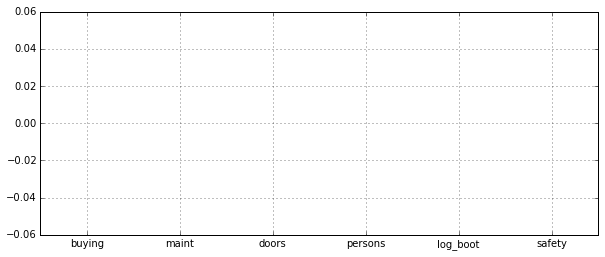

In [706]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
df_edible.boxplot(ax=ax)
plt.show()

In [707]:
df_poisonous.describe()

,buying,maint,doors,persons,log_boot,safety
count,46,46.000000,46.000000,46.000000,46.000000,46.000000
mean,1,0.833333,0.521739,0.739130,0.521739,0.717391
std,0,0.168508,0.369532,0.252523,0.407656,0.250603
min,1,0.666667,0.000000,0.500000,0.000000,0.500000
25%,1,0.666667,0.333333,0.500000,0.000000,0.500000
50%,1,0.833333,0.666667,0.500000,0.500000,0.500000
75%,1,1.000000,0.916667,1.000000,1.000000,1.000000
max,1,1.000000,1.000000,1.000000,1.000000,1.000000


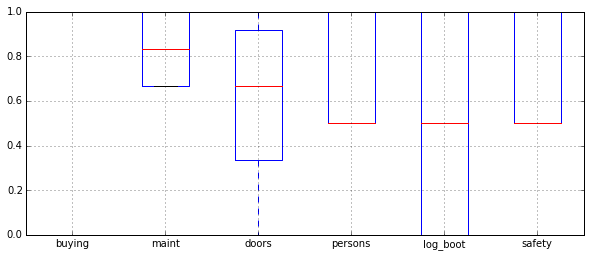

In [708]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
df_poisonous.boxplot(ax=ax)
plt.show()

In [709]:
d.describe()

,buying,maint,doors,persons,log_boot,safety
count,65.000000,65.000000,65.000000,65.000000,65.000000,65
mean,0.866667,0.733333,0.589744,0.769231,0.807692,1
std,0.164570,0.251385,0.352418,0.251199,0.245145,0
min,0.666667,0.333333,0.000000,0.500000,0.500000,1
25%,0.666667,0.666667,0.333333,0.500000,0.500000,1
50%,1.000000,0.666667,0.666667,1.000000,1.000000,1
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1
max,1.000000,1.000000,1.000000,1.000000,1.000000,1


In [710]:
df_edible = d[d['buying'] == 0]    # 0: edible
df_poisonous = d[d['buying'] == 1] # 1: poisonous

In [711]:
df_edible.describe()

,buying,maint,doors,persons,log_boot,safety
count,0,0,0,0,0,0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


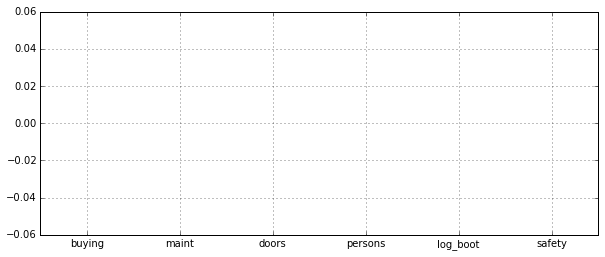

In [712]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
df_edible.boxplot(ax=ax)
plt.show()

In [713]:
df_poisonous.describe()

,buying,maint,doors,persons,log_boot,safety
count,39,39.000000,39.000000,39.000000,39.000000,39
mean,1,0.666667,0.589744,0.769231,0.807692,1
std,0,0.275723,0.354268,0.252518,0.246432,0
min,1,0.333333,0.000000,0.500000,0.500000,1
25%,1,0.333333,0.333333,0.500000,0.500000,1
50%,1,0.666667,0.666667,1.000000,1.000000,1
75%,1,1.000000,1.000000,1.000000,1.000000,1
max,1,1.000000,1.000000,1.000000,1.000000,1


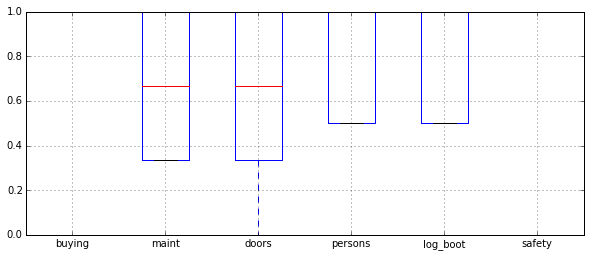

In [714]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
df_poisonous.boxplot(ax=ax)
plt.show()

In [715]:
eval_name = ('unacc','acc','good','vgood')
df_group_eval = df.groupby('eval')['eval']

In [561]:
eval_unacc_Sub_Df = df[df['eval']== eval_name[0]]
eval_acc_Sub_Df = df[df['eval']== eval_name[1]]
eval_good_Sub_Df = df[df['eval']== eval_name[2]]
eval_vgood_Sub_Df = df[df['eval']== eval_name[3]]

buying vs maint : 유지보수 가격이 낮고 자동차 가격이 낮으면 매우 만족도가 높은 경향을 보임. 반대로 유지보수 가격이 높고 자동차 가격이 높을수록 불만족.

buying vs doors : 같은 문의 갯수라면 가격이 낮을수록 만족도가 높음. 그러나 같은 가격일 경우 문의 갯수는 만족도와 전혀 상관없음

buying vs persons : 자동차 가격이 아무리 싸더라도 승차인원이 적으면 만족도가 낮음. 같은 가격이라면 승차인원이 많을 경우가 더 만족도가 높음

buying vs lug_boot : 자동차 가격이 비싸면 트렁크 크기와 상관없이 보통의 만족도를 보임. 자동차 가격이 싼 경우에는 트렁크 크기가 클경우 만족도가 높음

buying vs safety : 안전도가 낮은 경우 자동차 가격과 상관없이 불만족. 가격이 싸고 안전도가 높을수록 만족도가 높음


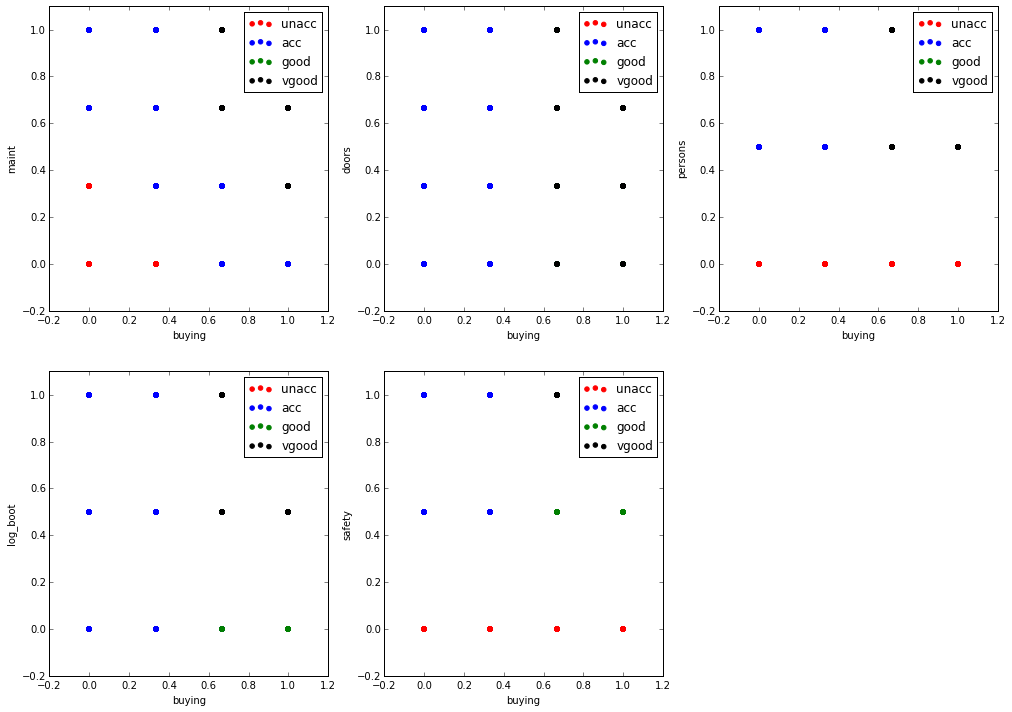

In [766]:
unit_str1 = ' (price)'
unit_str2 = ' (EA)'
unit_str3 = ' (person)'
unit_str4 = ' (size)'
options = {
    0: {
        'data_x': feature_names[0],
        'data_y': feature_names[1],
        'label_x': feature_names[0],
        'label_y': feature_names[1],
        'ylim_min': -0.2,
        'ylim_max': 1.1
    },
    1: {
        'data_x': feature_names[0],
        'data_y': feature_names[2],
        'label_x': feature_names[0],
        'label_y': feature_names[2],
        'ylim_min': -0.2,
        'ylim_max': 1.1
    },
    2: {
        'data_x': feature_names[0],
        'data_y': feature_names[3],
        'label_x': feature_names[0],
        'label_y': feature_names[3],
        'ylim_min': -0.2,
        'ylim_max': 1.1
    },
    3: {
        'data_x': feature_names[0],
        'data_y': feature_names[4],
        'label_x': feature_names[0],
        'label_y': feature_names[4],
        'ylim_min': -0.2,
        'ylim_max': 1.1
    },
    4: {
        'data_x': feature_names[0],
        'data_y': feature_names[5],
        'label_x': feature_names[0],
        'label_y': feature_names[5],
        'ylim_min': -0.2,
        'ylim_max': 1.1
    }
}
ax = []
fig = plt.figure(figsize=(17, 12))

for i in range(0,5):
    ax.append(fig.add_subplot(230 + (i+1)))


for i in range(0,5):
    e_unacc = ax[i].scatter(eval_unacc_Sub_Df[options[i]['data_x']], eval_unacc_Sub_Df[options[i]['data_y']], color='red')
    e_acc = ax[i].scatter(eval_acc_Sub_Df[options[i]['data_x']], eval_acc_Sub_Df[options[i]['data_y']], color='blue')
    e_good = ax[i].scatter(eval_good_Sub_Df[options[i]['data_x']], eval_good_Sub_Df[options[i]['data_y']], color='green')
    e_vgood = ax[i].scatter(eval_vgood_Sub_Df[options[i]['data_x']], eval_vgood_Sub_Df[options[i]['data_y']], color='black')
    ax[i].set_xlabel(options[i]['label_x'])
    ax[i].set_ylabel(options[i]['label_y'])
    ax[i].set_ylim([options[i]['ylim_min'], options[i]['ylim_max']])
    ax[i].legend((e_unacc, e_acc, e_good,e_vgood), eval_name)
    
str1 = 'buying vs maint : 유지보수 가격이 낮고 자동차 가격이 낮으면 매우 만족도가 높은 경향을 보임. 반대로 유지보수 가격이 높고 자동차 가격이 높을수록 불만족.'
str2 = 'buying vs doors : 같은 문의 갯수라면 가격이 낮을수록 만족도가 높음. 그러나 같은 가격일 경우 문의 갯수는 만족도와 전혀 상관없음'
str3 = 'buying vs persons : 자동차 가격이 아무리 싸더라도 승차인원이 적으면 만족도가 낮음. 같은 가격이라면 승차인원이 많을 경우가 더 만족도가 높음'
str4 = 'buying vs lug_boot : 자동차 가격이 비싸면 트렁크 크기와 상관없이 보통의 만족도를 보임. 자동차 가격이 싼 경우에는 트렁크 크기가 클경우 만족도가 높음'
str5 = 'buying vs safety : 안전도가 낮은 경우 자동차 가격과 상관없이 불만족. 가격이 싸고 안전도가 높을수록 만족도가 높음' 
print str1
print
print str2
print
print str3
print
print str4
print
print str5

maint vs doors : 유지보수 가격이나 문의 갯수와는 거의 상관없이 만족도가 높음

maint vs persons : 유지보수 비용과 상관없이 승차인원수가 적으면 불만족임

maint vs lug_boot : 트렁크가 작을 경우 유지보수 비용이 낮을 수록 만족도가 높음. 그 외의 경우는 대체로 만족도 높음

maint vs safety : 유지보수 비용과 상관없이 안전도가 낮으면 불만족임. 안전도가 높으면 유지비용과 상관없이 대체로 만족 


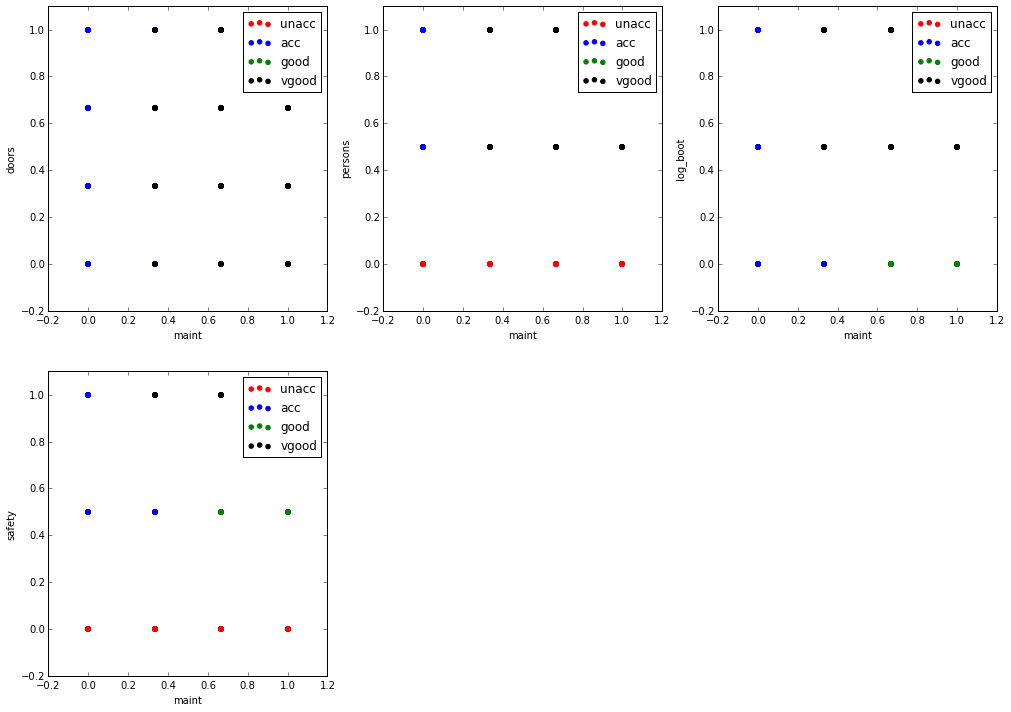

In [767]:
unit_str1 = ' (price)'
unit_str2 = ' (EA)'
unit_str3 = ' (person)'
unit_str4 = ' (size)'
options = {
    0: {
        'data_x': feature_names[1],
        'data_y': feature_names[2],
        'label_x': feature_names[1],
        'label_y': feature_names[2],
        'ylim_min': -0.2,
        'ylim_max': 1.1
    },
    1: {
        'data_x': feature_names[1],
        'data_y': feature_names[3],
        'label_x': feature_names[1],
        'label_y': feature_names[3],
        'ylim_min': -0.2,
        'ylim_max': 1.1
    },
    2: {
        'data_x': feature_names[1],
        'data_y': feature_names[4],
        'label_x': feature_names[1],
        'label_y': feature_names[4],
        'ylim_min': -0.2,
        'ylim_max': 1.1
    },
    3: {
        'data_x': feature_names[1],
        'data_y': feature_names[5],
        'label_x': feature_names[1],
        'label_y': feature_names[5],
        'ylim_min': -0.2,
        'ylim_max': 1.1
    }
}
ax = []
fig = plt.figure(figsize=(17, 12))

for i in range(0,4):
    ax.append(fig.add_subplot(230 + (i+1)))


for i in range(0,4):
    e_unacc = ax[i].scatter(eval_unacc_Sub_Df[options[i]['data_x']], eval_unacc_Sub_Df[options[i]['data_y']], color='red')
    e_acc = ax[i].scatter(eval_acc_Sub_Df[options[i]['data_x']], eval_acc_Sub_Df[options[i]['data_y']], color='blue')
    e_good = ax[i].scatter(eval_good_Sub_Df[options[i]['data_x']], eval_good_Sub_Df[options[i]['data_y']], color='green')
    e_vgood = ax[i].scatter(eval_vgood_Sub_Df[options[i]['data_x']], eval_vgood_Sub_Df[options[i]['data_y']], color='black')
    ax[i].set_xlabel(options[i]['label_x'])
    ax[i].set_ylabel(options[i]['label_y'])
    ax[i].set_ylim([options[i]['ylim_min'], options[i]['ylim_max']])
    ax[i].legend((e_unacc, e_acc, e_good,e_vgood), eval_name)

str1 = 'maint vs doors : 유지보수 가격이나 문의 갯수와는 거의 상관없이 만족도가 높음'
str2 = 'maint vs persons : 유지보수 비용과 상관없이 승차인원수가 적으면 불만족임'
str3 = 'maint vs lug_boot : 트렁크가 작을 경우 유지보수 비용이 낮을 수록 만족도가 높음. 그 외의 경우는 대체로 만족도 높음'
str4 = 'maint vs safety : 유지보수 비용과 상관없이 안전도가 낮으면 불만족임. 안전도가 높으면 유지비용과 상관없이 대체로 만족 '

print str1
print
print str2
print
print str3
print
print str4

doors vs persons : 문의 갯수와 상관없이 승차인원이 적으면 불만족. 승차인원이 4인이상이면 모두 만족

doors vs lug_boot : 문의 갯수와 상관없이 트렁크의 크기가 작을경우보다 보통이거나 클경우 만족

doors vs safety : 문의 갯수와 상관없이 안전도에 따라 만족도가 달라짐. 안전도가 높을수록 만족


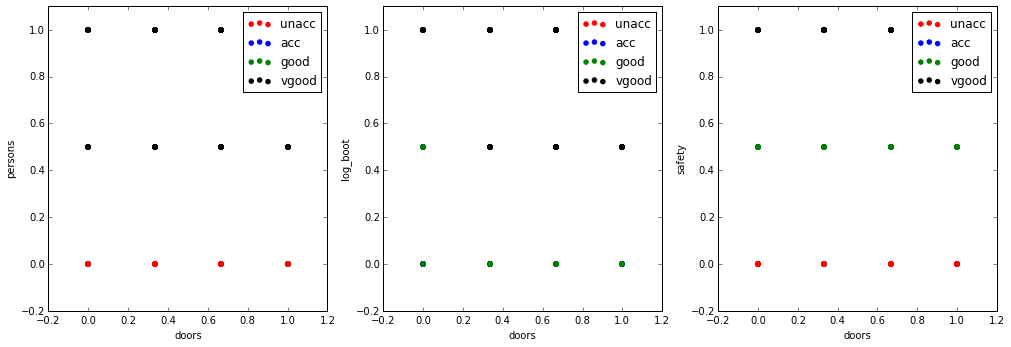

In [769]:
unit_str1 = ' (price)'
unit_str2 = ' (EA)'
unit_str3 = ' (person)'
unit_str4 = ' (size)'
options = {
    0: {
        'data_x': feature_names[2],
        'data_y': feature_names[3],
        'label_x': feature_names[2],
        'label_y': feature_names[3],
        'ylim_min': -0.2,
        'ylim_max': 1.1
    },
    1: {
        'data_x': feature_names[2],
        'data_y': feature_names[4],
        'label_x': feature_names[2],
        'label_y': feature_names[4],
        'ylim_min': -0.2,
        'ylim_max': 1.1
    },
    2: {
        'data_x': feature_names[2],
        'data_y': feature_names[5],
        'label_x': feature_names[2],
        'label_y': feature_names[5],
        'ylim_min': -0.2,
        'ylim_max': 1.1
    }
}
ax = []
fig = plt.figure(figsize=(17, 12))

for i in range(0,3):
    ax.append(fig.add_subplot(230 + (i+1)))


for i in range(0,3):
    e_unacc = ax[i].scatter(eval_unacc_Sub_Df[options[i]['data_x']], eval_unacc_Sub_Df[options[i]['data_y']], color='red')
    e_acc = ax[i].scatter(eval_acc_Sub_Df[options[i]['data_x']], eval_acc_Sub_Df[options[i]['data_y']], color='blue')
    e_good = ax[i].scatter(eval_good_Sub_Df[options[i]['data_x']], eval_good_Sub_Df[options[i]['data_y']], color='green')
    e_vgood = ax[i].scatter(eval_vgood_Sub_Df[options[i]['data_x']], eval_vgood_Sub_Df[options[i]['data_y']], color='black')
    ax[i].set_xlabel(options[i]['label_x'])
    ax[i].set_ylabel(options[i]['label_y'])
    ax[i].set_ylim([options[i]['ylim_min'], options[i]['ylim_max']])
    ax[i].legend((e_unacc, e_acc, e_good,e_vgood), eval_name)

str1 = 'doors vs persons : 문의 갯수와 상관없이 승차인원이 적으면 불만족. 승차인원이 4인이상이면 모두 만족'
str2 = 'doors vs lug_boot : 문의 갯수와 상관없이 트렁크의 크기가 작을경우보다 보통이거나 클경우 만족'
str3 = 'doors vs safety : 문의 갯수와 상관없이 안전도에 따라 만족도가 달라짐. 안전도가 높을수록 만족'

print str1
print
print str2
print
print str3

persons vs lug_boot : 승차 인원이 적으면 트렁크 크기와 상관없이 불만족. 4명이상이 승차하면 트렁크가 클수록 만족

persons vs safety : 안전도가 낮으면 승차인원과 상관없이 만족도가 낮음. 승차인원이 2명이면 안전도와 상관없이 불만족.그외에는 안전도가 높을수록 만족



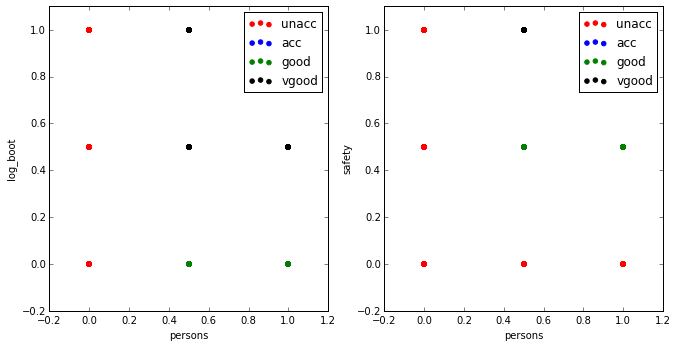

In [770]:
unit_str1 = ' (price)'
unit_str2 = ' (EA)'
unit_str3 = ' (person)'
unit_str4 = ' (size)'
options = {
    0: {
        'data_x': feature_names[3],
        'data_y': feature_names[4],
        'label_x': feature_names[3],
        'label_y': feature_names[4],
        'ylim_min': -0.2,
        'ylim_max': 1.1
    },
    1: {
        'data_x': feature_names[3],
        'data_y': feature_names[5],
        'label_x': feature_names[3],
        'label_y': feature_names[5],
        'ylim_min': -0.2,
        'ylim_max': 1.1
    }
}
ax = []
fig = plt.figure(figsize=(17, 12))

for i in range(0,2):
    ax.append(fig.add_subplot(230 + (i+1)))


for i in range(0,2):
    e_unacc = ax[i].scatter(eval_unacc_Sub_Df[options[i]['data_x']], eval_unacc_Sub_Df[options[i]['data_y']], color='red')
    e_acc = ax[i].scatter(eval_acc_Sub_Df[options[i]['data_x']], eval_acc_Sub_Df[options[i]['data_y']], color='blue')
    e_good = ax[i].scatter(eval_good_Sub_Df[options[i]['data_x']], eval_good_Sub_Df[options[i]['data_y']], color='green')
    e_vgood = ax[i].scatter(eval_vgood_Sub_Df[options[i]['data_x']], eval_vgood_Sub_Df[options[i]['data_y']], color='black')
    ax[i].set_xlabel(options[i]['label_x'])
    ax[i].set_ylabel(options[i]['label_y'])
    ax[i].set_ylim([options[i]['ylim_min'], options[i]['ylim_max']])
    ax[i].legend((e_unacc, e_acc, e_good,e_vgood), eval_name)
    
str1 = 'persons vs lug_boot : 승차 인원이 적으면 트렁크 크기와 상관없이 불만족. 4명이상이 승차하면 트렁크가 클수록 만족'
str2 = 'persons vs safety : 안전도가 낮으면 승차인원과 상관없이 만족도가 낮음. 승차인원이 2명이면 안전도와 상관없이 불만족.그외에는 안전도가 높을수록 만족'

print str1
print
print str2
print

lug_boot vs safety : 안전도가 낮으면 트렁크 크기와 상관없이 불만족. 안전도가 보통이상이라면 트렁크 크기가 클수록 만족



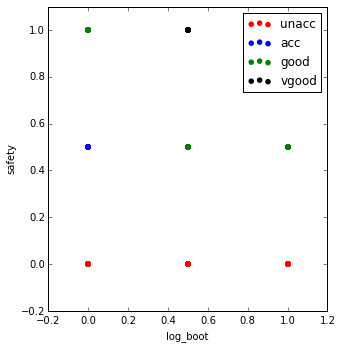

In [771]:
unit_str1 = ' (price)'
unit_str2 = ' (EA)'
unit_str3 = ' (person)'
unit_str4 = ' (size)'
options = {
    0: {
        'data_x': feature_names[4],
        'data_y': feature_names[5],
        'label_x': feature_names[4],
        'label_y': feature_names[5],
        'ylim_min': -0.2,
        'ylim_max': 1.1
    }
}
ax = []
fig = plt.figure(figsize=(17, 12))

ax.append(fig.add_subplot(230))

e_unacc = ax[0].scatter(eval_unacc_Sub_Df[options[0]['data_x']], eval_unacc_Sub_Df[options[0]['data_y']], color='red')
e_acc = ax[0].scatter(eval_acc_Sub_Df[options[0]['data_x']], eval_acc_Sub_Df[options[0]['data_y']], color='blue')
e_good = ax[0].scatter(eval_good_Sub_Df[options[0]['data_x']], eval_good_Sub_Df[options[0]['data_y']], color='green')
e_vgood = ax[0].scatter(eval_vgood_Sub_Df[options[0]['data_x']], eval_vgood_Sub_Df[options[0]['data_y']], color='black')
ax[0].set_xlabel(options[0]['label_x'])
ax[0].set_ylabel(options[0]['label_y'])
ax[0].set_ylim([options[0]['ylim_min'], options[0]['ylim_max']])
ax[0].legend((e_unacc, e_acc, e_good,e_vgood), eval_name)
str1 = 'lug_boot vs safety : 안전도가 낮으면 트렁크 크기와 상관없이 불만족. 안전도가 보통이상이라면 트렁크 크기가 클수록 만족'


print str1
print